# Exploratory Data Analysis for an Online Retail Data

## Step 1: Importing necessary Libraries

In [1]:
# import pytho modules for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Step 2: Loading the Dataset.
* Data Source is from the popular [Online Retail Store](https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Datasets/Online_Retail.csv)

In [2]:
url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Datasets/Online_Retail.csv"
online_retail_data = pd.read_csv(url, encoding= 'unicode_escape', parse_dates=['InvoiceDate'])

## Step 3: Viewing the dataset.
We can quickly find out how many rows and columns there are in our dataset by using the shape method. This returns a tuple which contains the number of rows and columns.

Shape of the data

In [3]:
# number of columns and rows
online_retail_data.shape

(541909, 8)

Previewing the Dataset

In [4]:
online_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Additional Columns
* Add some extra columns from the preview above.
  
  1. Add __TotalAmount = Quantity * UnitPrice__
  2. Add __Date__ extracted from __InvoiceDate__ datetime column

In [7]:
# add TotalAmount
online_retail_data['TotalAmount'] = online_retail_data['Quantity'] * online_retail_data['UnitPrice']
# add Date
online_retail_data['Date'] = online_retail_data['InvoiceDate'].dt.date

In [8]:
online_retail_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01


#### Getting Columns names

In [9]:
online_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'Date'],
      dtype='object')

#### Getting Concise info of dataset

In [10]:
# Basic Information about the data
online_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalAmount  541909 non-null  float64       
 9   Date         541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.3+ MB


#### Check the columns Data Types

In [11]:
online_retail_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
Date                   object
dtype: object

### Change the CustomerID column from float64 to object

In [12]:
## using dictionary to convert specific columns
convert_dic = {
    'CustomerID': str
}
online_retail_data = online_retail_data.astype(convert_dic)

#### Getting the Descriptive statistics.

In [13]:
# Describe the data - descriptive statistics
online_retail_data.describe(include='all', datetime_is_numeric=True)
# Specifying datetime_is_numeric=True adopts the future behavior of Treating datetime data as categorical rather than numeric in `.describe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date
count,541909,541909,540455,541909.000000,541909,541909.000000,541909,541909,541909.000000,541909
unique,25900,4070,4223,NaN,NaN,NaN,4373,38,NaN,305
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,nan,United Kingdom,NaN,2011-12-05
freq,1114,2313,2369,NaN,NaN,NaN,135080,495478,NaN,5331
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,NaN,NaN,17.987795,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,NaN,NaN,-168469.600000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,NaN,NaN,3.400000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,NaN,NaN,9.750000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,NaN,NaN,17.400000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN,168469.600000,NaN


#### Checking Duplicates
* The pandas.DataFrame.duplicated.sum() function returns a Series or DataFrame containing the sum of the boolean values (True or False) in the duplicate rows of the DataFrame.

In [14]:
online_retail_data.duplicated().sum()

5268

### Checking Unique Values

In [15]:
# unique values of Country
print(online_retail_data['Country'].nunique())
online_retail_data['Country'].unique()

38


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

### DATA CLEANING

#### Missing Values
* We check for missing values by utilizing the __isna()__ method, which returns a dataframe of boolean values indicating whether or not a field is null. We can use the sum() method to group all missing values by column.

In [16]:
# Handling Missing Values
online_retail_data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
TotalAmount       0
Date              0
dtype: int64

In [17]:
# Getting proportion of missing values
online_retail_data.isnull().sum() * 100/online_retail_data.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.268311
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
TotalAmount    0.000000
Date           0.000000
dtype: float64

#### Dropping Rows with Null Values
* The include rows whose __CustomerID__ have null values.

In [18]:
# drop rows with NaN values
# axis=0 is used to drop the row with NaN values.
updated_online_retail_data = online_retail_data.dropna()
updated_online_retail_data.shape

(540455, 10)

#### Dropping Records with the following:
1. Transactions with negative and 0 __UnitPrice__ values, or
2. Transactions with negative and 0 __Quantity__ value, or
3. Transactions with negative and 0 __TotalAmount__ values

In [25]:
# Count Rows with Negative Quantity values
print("Rows with Zero UnitPrice values: ", updated_online_retail_data[updated_online_retail_data['UnitPrice'] == 0].shape)

# Count Rows with Negative Quantity values
print("Rows with Negative Quantity values: ", updated_online_retail_data[updated_online_retail_data['Quantity'] < 0].shape)

# Count Rows with Negative UnitPrice values
print("Rows with Negative UnitPrice values: ", updated_online_retail_data[updated_online_retail_data['UnitPrice'] < 0].shape)

# Count Rows with Negative TotalAmount 
print("Rows with Negative TotalAmount values: ", updated_online_retail_data[updated_online_retail_data['TotalAmount'] < 0].shape)

Rows with Zero UnitPrice values:  (1061, 10)
Rows with Negative Quantity values:  (9762, 10)
Rows with Negative UnitPrice values:  (2, 10)
Rows with Negative TotalAmount values:  (9290, 10)


* We have no records with zero __Quantity__ values.

In [30]:
# check for records with the above state of data
data_records_with_outliers = updated_online_retail_data[
    (updated_online_retail_data['UnitPrice'] <= 0)
    |
    (updated_online_retail_data['Quantity'] <= 0)
    |
    (updated_online_retail_data['TotalAmount'] <= 0)
    ]

# save the output to a csv file
## data_records_with_outliers.to_csv("data_records_with_outliers.csv")

data_records_with_outliers.shape

(10351, 10)

In [31]:
# dropping the above records 
updated_online_retail_data = updated_online_retail_data[
    (updated_online_retail_data['UnitPrice'] > 0)
    &
    (updated_online_retail_data['Quantity'] > 0)
    &
    (updated_online_retail_data['TotalAmount'] > 0)
    ]
# check the records
updated_online_retail_data.shape

(530104, 10)

### Dropping Rows whose CustomerIDs have nan values
* Some of the __CustomerID__'s have __nan__ values.

In [32]:
# check for rows that have nan CustomerID
updated_online_retail_data[updated_online_retail_data['CustomerID'].isin(['nan'])].shape

# you can save the results in a csv file
##updated_online_retail_data[updated_online_retail_data['CustomerID'].isin(['nan'])].to_csv('data_records_with_nan_customer_ids.csv')

In [33]:
# remove the records with nan CustomerID
updated_online_retail_data = updated_online_retail_data[~updated_online_retail_data['CustomerID'].isin(['nan'])]

# check the new shape of the data
updated_online_retail_data.shape

(397884, 10)

### Preview the New Data Frame

In [34]:
# preview the cleaned data
updated_online_retail_data.describe(include='all', datetime_is_numeric=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date
count,397884,397884,397884,397884.000000,397884,397884.000000,397884,397884,397884.000000,397884
unique,18532,3665,3877,NaN,NaN,NaN,4338,37,NaN,305
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841.0,United Kingdom,NaN,2011-11-06
freq,542,2035,2028,NaN,NaN,NaN,7847,354321,NaN,3423
mean,NaN,NaN,NaN,12.988238,2011-07-10 23:41:23.511023360,3.116488,NaN,NaN,22.397000,NaN
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.001000,NaN,NaN,0.001000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,NaN,NaN,4.680000,NaN
50%,NaN,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,NaN,NaN,11.800000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,NaN,NaN,19.800000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,NaN,NaN,168469.600000,NaN


## Grouping the DataFrame

#### Grouping Data 1: Group By CustomerID

In [35]:
# group the data using CustomerID, Date and Country
grouped_daily_customer_data = updated_online_retail_data.groupby(['CustomerID', 'Date', 'Country']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

In [41]:
# save results in a csv file
## grouped_daily_customer_data.to_csv("grouped_daily_customer_data.csv", date_format='%Y-%m-%d')

#### Grouping Data 2: Group Data By Country
* __Goals__:
  * Calculate __Average Sales Value__ per Country.

In [37]:
# group the data by country and understand the summary data by Country
grouped_country_data = updated_online_retail_data.groupby( 'Country').agg(
    CountOfUniqueCustomers = pd.NamedAgg(column = 'CustomerID', aggfunc = 'nunique'),
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

In [38]:
# calculate the Average Basket Value 
grouped_country_data['AverageSalesValue'] = grouped_country_data['TotalAmount'] / grouped_country_data['CountOfUniqueCustomers']

# save the output in a csv file
## grouped_country_data.to_csv("grouped_country_data.csv")

## Analyzing the Data

### Univariate Analysis

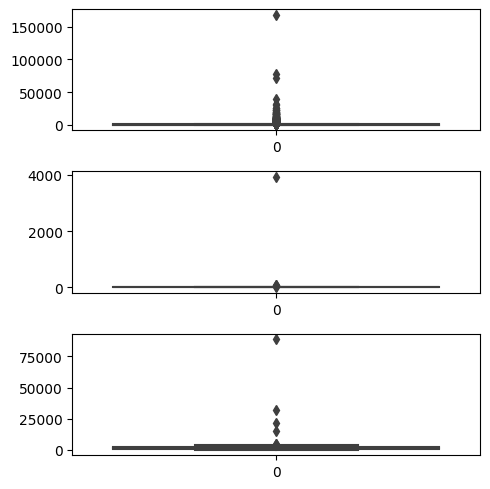

In [48]:
# handling outliers
fig, axs = plt.subplots(3, figsize = (5, 5))
plt1 = sns.boxplot(grouped_daily_customer_data['TotalAmount'], ax = axs[0])
plt2 = sns.boxplot(grouped_country_data['CountOfUniqueCustomers'], ax = axs[1])
plt3 = sns.boxplot(grouped_country_data['AverageSalesValue'], ax = axs[2])

plt.tight_layout()